In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import seaborn as sns

Mounted at /content/drive


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('wordnet_ic')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package wordnet_ic to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet_ic.zip.


True

In [ ]:
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from textblob import TextBlob


In [ ]:
sheet_names =  ["3 Answers", "4 Answers", "5 Answers",  "6 Answers", "7 Answers"]
all_df =pd.DataFrame([])
for sheet_namee in sheet_names:
  all_df =  pd.concat([all_df, pd.read_excel("/content/drive/MyDrive/EEE_486/Code/Family Feud Question Database (1).xlsx", sheet_name = sheet_namee).iloc[:,1:]],axis = 0)

all_df = all_df.reset_index()
all_df = all_df.drop(columns = "index")


In [ ]:
all_answers = pd.DataFrame([])
for i in np.arange(0,14,2):
  adds = pd.DataFrame(all_df.iloc[:,i:i+2])
  adds.columns = ["answer", "answer_freq"]
  all_answers = pd.concat([all_answers, adds], axis =0)

all_answers = all_answers.dropna()
all_answers = (all_answers.reset_index()).drop(columns = "index")

all_answers = all_answers[all_answers['answer'].apply(lambda x: not isinstance(x, int))]

In [ ]:
new_df = all_df.drop(columns = ["#1", "#2", "#3", "#4", "#5", "#6","#7"])
ordered =pd.DataFrame([])
for i in range(7):
  answer_col = pd.concat([new_df.iloc[:,i],pd.DataFrame([np.ones(len(new_df.iloc[:,i]))*(i+1)]).T],axis=1)
  answer_col.columns = ["answer","rank"]
  ordered = pd.concat([ordered, answer_col], axis =0)
ordered = ordered.dropna()
ordered = (ordered.reset_index()).drop(columns = "index")

ordered = ordered[ordered['answer'].apply(lambda x: not isinstance(x, int))]


In [ ]:
ordered["rank"].unique()

array([1., 2., 3., 4., 5., 6., 7.])

In [ ]:
df = ordered[ordered["answer"].apply(lambda x: x.isalpha())]
all_answers = all_answers[all_answers["answer"].apply(lambda x: x.isalpha())]
ordered["freq"] = all_answers["answer_freq"]
df = ordered.dropna()



In [ ]:
df

,answer,rank,freq
1,Couch,1.0,55.0
2,Server,1.0,65.0
3,Cane,1.0,65.0
4,Beer,1.0,67.0
7,Watch,1.0,58.0
...,...,...,...
20969,No,7.0,3.0
20970,Oil,7.0,3.0
20972,shop,7.0,5.0
20973,Smoking,7.0,3.0


In [ ]:
df["rank"].unique()

array([1., 2., 3., 4., 5., 6., 7.])

In [ ]:
basics = pd.read_csv("/content/drive/MyDrive/EEE_486/Code/single_word.csv")["CUE"]

In [ ]:
#df = pd.read_csv("/content/drive/MyDrive/EEE_486/Code/labels.csv")

In [ ]:
for kelime in basics:
  df["label"]= np.where(df['answer'].str.lower().isin(basics), 1, 0)


<ipython-input-16-cc4ab3473919>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"]= np.where(df['answer'].str.lower().isin(basics), 1, 0)


In [ ]:
all_df = df

all_df = all_df.dropna()

all_df = (all_df.reset_index()).drop(columns = "index")
for kel in all_df["answer"]:

  index = kel.find('/')
  if index != -1:
    all_df["answer"].iloc[all_df[all_df["answer"] == kel].index] = kel[:index]
  index = kel.find('Popcor')
  if kel.lower() == "popcor":
     all_df["answer"].iloc[all_df[all_df["answer"] == kel].index] ="popcorn"




all_df = (all_df.reset_index()).drop(columns = "index")
length_list = []
for kel in all_df["answer"]:
  length_list.append(len(kel))
all_df["length"] = length_list

In [ ]:
all_df

,answer,rank,freq,label,length
0,Couch,1.0,55.0,1,5
1,Server,1.0,65.0,1,6
2,Cane,1.0,65.0,1,4
3,Beer,1.0,67.0,1,4
4,Watch,1.0,58.0,1,5
...,...,...,...,...,...
12452,No,7.0,3.0,1,2
12453,Oil,7.0,3.0,1,3
12454,shop,7.0,5.0,1,4
12455,Smoking,7.0,3.0,0,7


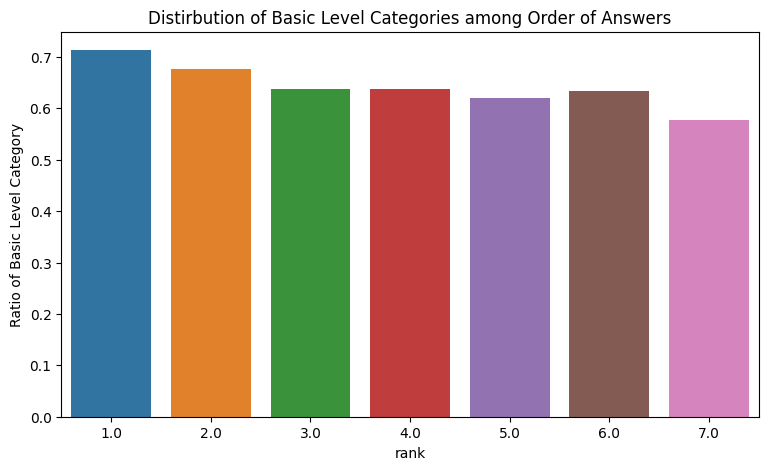

In [ ]:
grouped_ranked = pd.DataFrame(all_df[["label","rank"]][all_df["label"]==1].groupby(by = "rank", group_keys=True).apply(lambda x: len(x))/ all_df[["label","rank"]].groupby(by = "rank", group_keys=True).apply(lambda x: len(x)))
grouped_ranked.columns = ["Ratio of Basic Level Category"]
plt.figure(figsize=(9,5))
sns.barplot(x= grouped_ranked.index, y="Ratio of Basic Level Category", data=grouped_ranked)
plt.title("Distirbution of Basic Level Categories among Order of Answers")

# Display the plot
plt.show()

In [ ]:
grouped_ranked

,Ratio of Basic Level Category
rank,
1.0,0.713476
2.0,0.675911
3.0,0.637363
4.0,0.637112
5.0,0.620795
6.0,0.633268
7.0,0.576577


In [ ]:
grouped_ranked.values.reshape(-1,1)

array([[1763],
       [1633],
       [1450],
       [1394],
       [1015],
       [ 651],
       [ 256]])

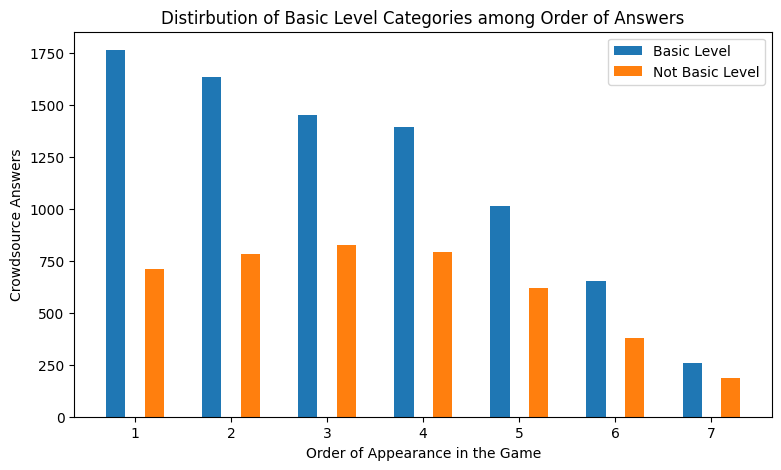

In [ ]:
grouped_ranked = pd.DataFrame(all_df[["label","rank"]][all_df["label"]==1].groupby(by = "rank", group_keys=True).apply(lambda x: len(x)))
grouped_ranked.columns = ["Ratio of Basic Level Category"]

grouped_ranked2 = pd.DataFrame(all_df[["label","rank"]][all_df["label"]==0].groupby(by = "rank", group_keys=True).apply(lambda x: len(x)))
grouped_ranked2.columns = ["Ratio of Basic Level Category"]
plt.figure(figsize=(9,5))
plt.bar(np.arange(1,8)-0.2, grouped_ranked.values.reshape(-1), 0.2,label="Basic Level")
plt.bar(np.arange(1,8)+0.2, grouped_ranked2.values.reshape(-1),0.2,label="Not Basic Level")
plt.title("Distirbution of Basic Level Categories among Order of Answers")
# Display the plot
plt.legend()
plt.xlabel("Order of Appearance in the Game")
plt.ylabel("Crowdsource Answers")
plt.show()


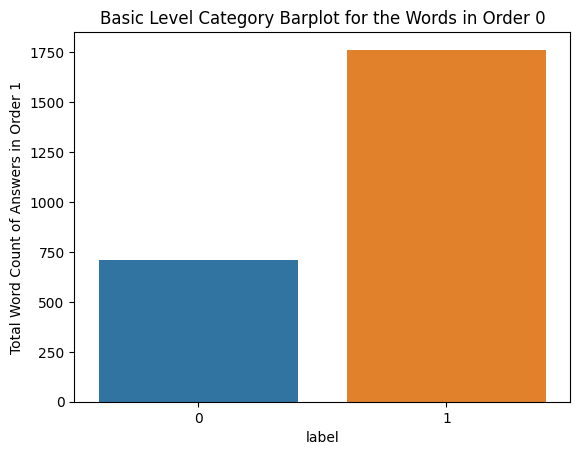

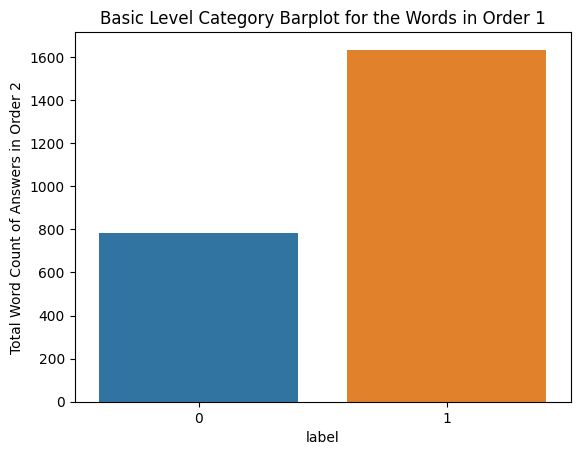

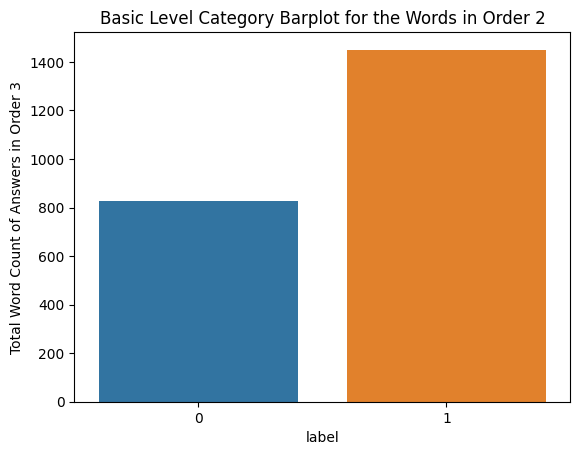

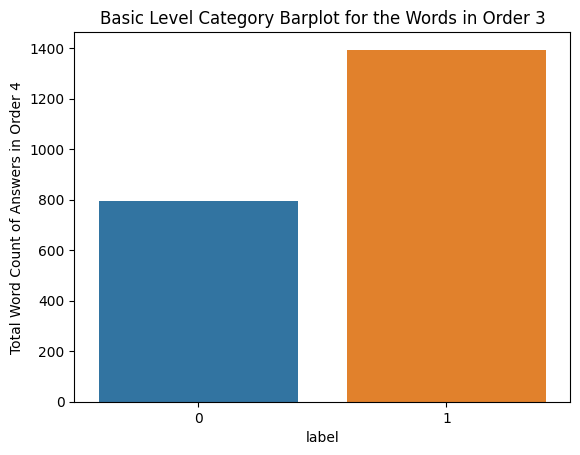

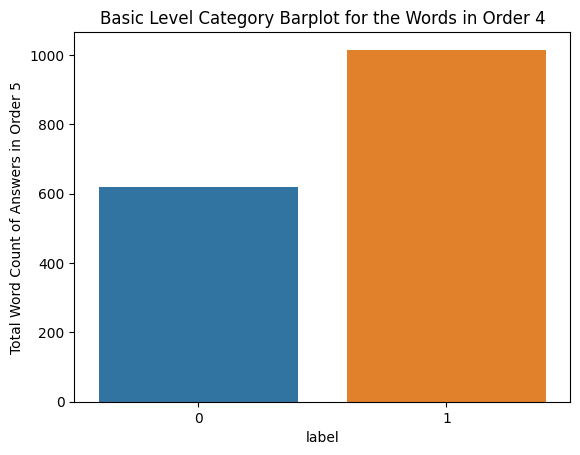

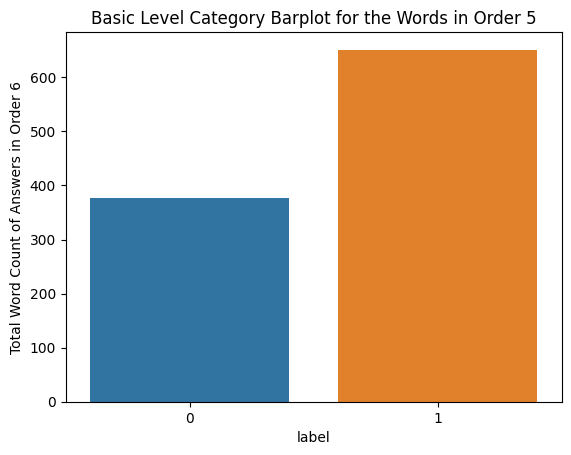

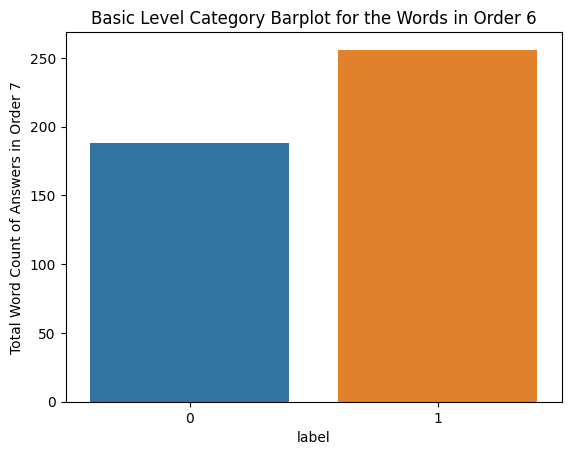

In [ ]:
for i in range(7):
  rank_count = pd.DataFrame(all_df[(all_df["rank"]== i+1)].groupby(by = "label", group_keys=True).apply(lambda x: len(x)), columns = [f"Total Word Count of Answers in Order {i+1}"])
  sns.barplot(data=rank_count, x=rank_count.index, y = f"Total Word Count of Answers in Order {i+1}")
  plt.title(f"Basic Level Category Barplot for the Words in Order {i}")
  plt.show()

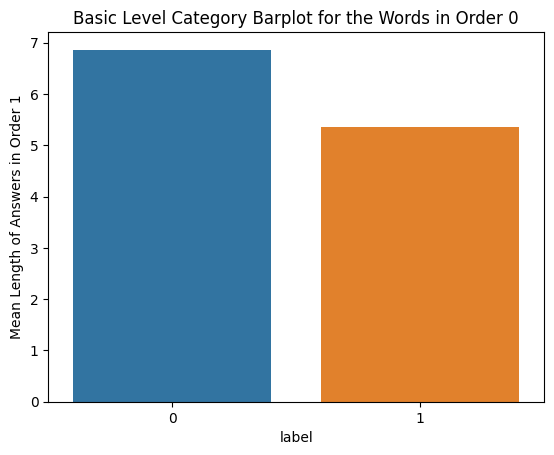

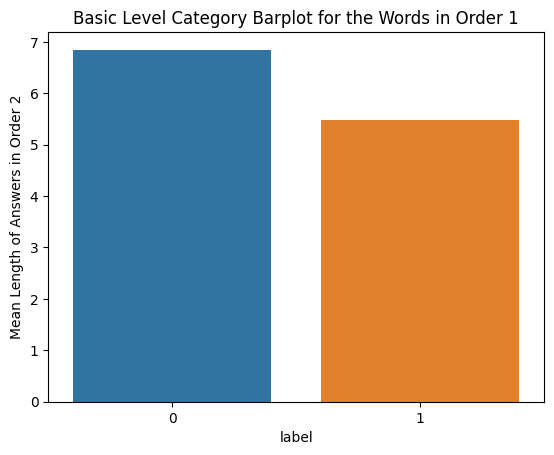

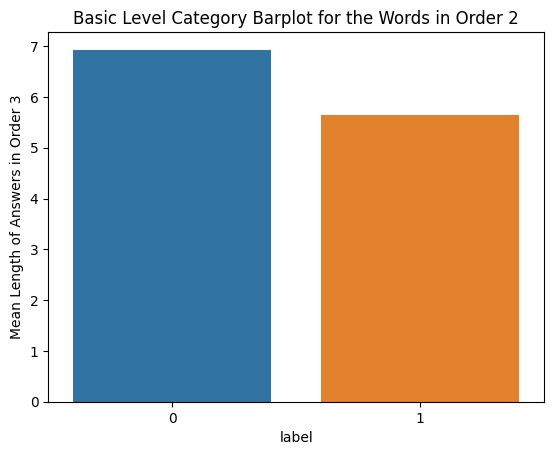

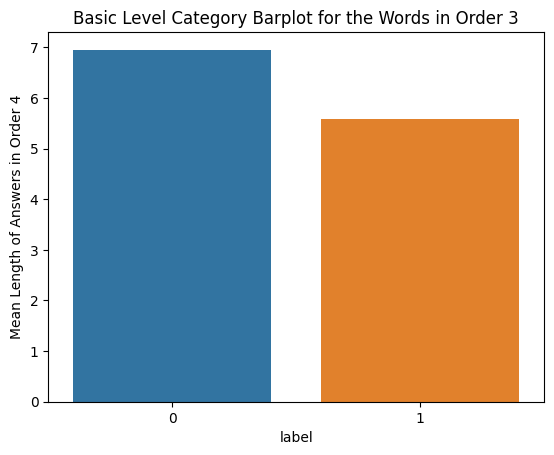

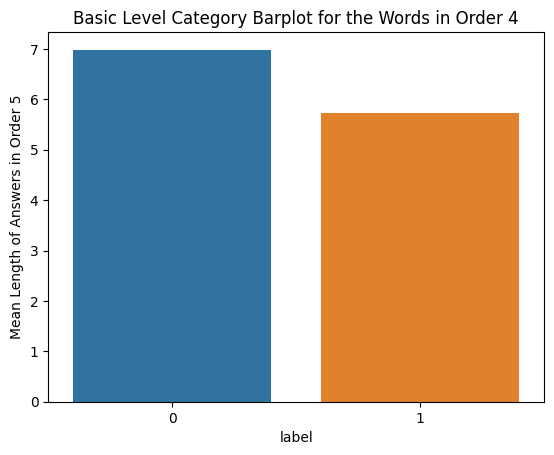

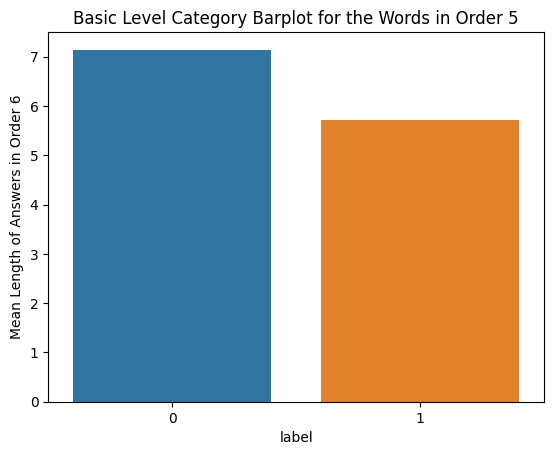

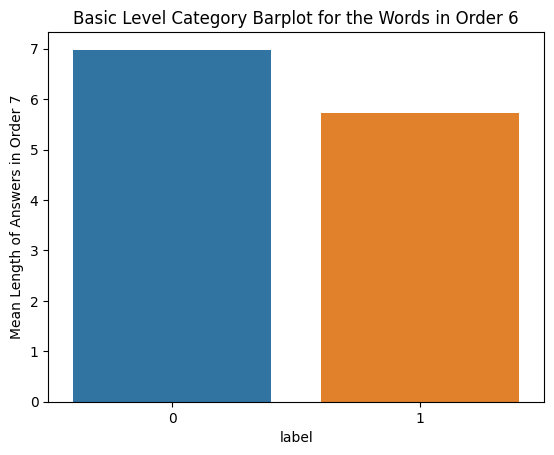

In [ ]:
for i in range(7):

  rank_count = pd.DataFrame(all_df[(all_df["rank"]== i+1)].groupby(by=["label"], dropna=False)["length"].mean())
  rank_count.columns = [f"Mean Length of Answers in Order {i+1}"]
  sns.barplot(data=rank_count, x=rank_count.index, y = f"Mean Length of Answers in Order {i+1}")
  plt.title(f"Basic Level Category Barplot for the Words in Order {i}")
  plt.show()

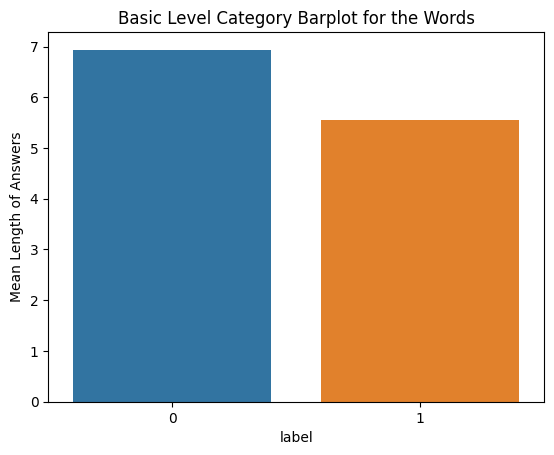

In [ ]:
rank_count = pd.DataFrame(all_df.groupby(by=["label"], dropna=False)["length"].mean())
rank_count.columns = [f"Mean Length of Answers"]
sns.barplot(data=rank_count, x=rank_count.index, y = f"Mean Length of Answers")
plt.title(f"Basic Level Category Barplot for the Words")
plt.show()

In [ ]:
grouped_ranked = pd.DataFrame(all_df[["label","rank"]][all_df["label"]==1].groupby(by = "rank", group_keys=True).apply(lambda x: len(x)))
grouped_ranked.columns = ["Ratio of Basic Level Category"]

grouped_ranked2 = pd.DataFrame(all_df[["label","rank"]][all_df["label"]==0].groupby(by = "rank", group_keys=True).apply(lambda x: len(x)))
grouped_ranked2.columns = ["Ratio of Basic Level Category"]
plt.figure(figsize=(9,5))
sns.boxplot(x='rank', y='Ratio of Basic Level Category', data=all_df[all_df["label"==1]][["Ratio of Basic Level Category","rank"]])
sns.boxplot(x='rank', y='Ratio of Basic Level Category', data=all_df[all_df["label"==1]][["Ratio of Basic Level Category","rank"]])

plt.bar(np.arange(1,8)-0.2, grouped_ranked.values.reshape(-1), 0.2,label="Basic Level")
plt.bar(np.arange(1,8)+0.2, grouped_ranked2.values.reshape(-1),0.2,label="Not Basic Level")
plt.title("Distirbution of Basic Level Categories among Order of Answers")
# Display the plot
plt.legend()
plt.xlabel("Order of Appearance in the Game")
plt.ylabel("Crowdsource Answers")
plt.show()


In [ ]:
all_df.groupby(by = "label", group_keys=True).apply(lambda x: x)["freq"]

label       
0      7        68.0
       8        53.0
       12       64.0
       15       59.0
       17       53.0
                ... 
1      12448     3.0
       12450     3.0
       12452     5.0
       12453     5.0
       12454     7.0
Name: freq, Length: 12457, dtype: float64

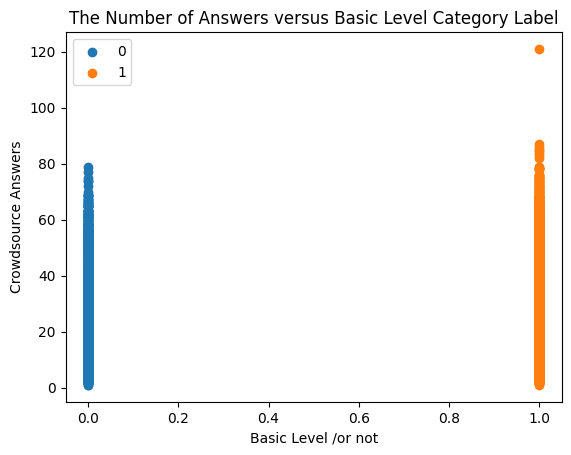

In [ ]:
df_grouped = all_df[["freq","label"]].groupby(by = "label")
fig, ax = plt.subplots()

for name, group in df_grouped:
    # Plot scatter plot for each group
    ax.scatter(group['label'], group['freq'], label=name)
ax.legend()
plt.title("The Number of Answers versus Basic Level Category Label")
plt.xlabel("Basic Level /or not")
plt.ylabel("Crowdsource Answers")

plt.show()

In [ ]:
df_grouped1.values.reshape(-1)

array([19.1361186 ,  1.        ,  3.15216859])

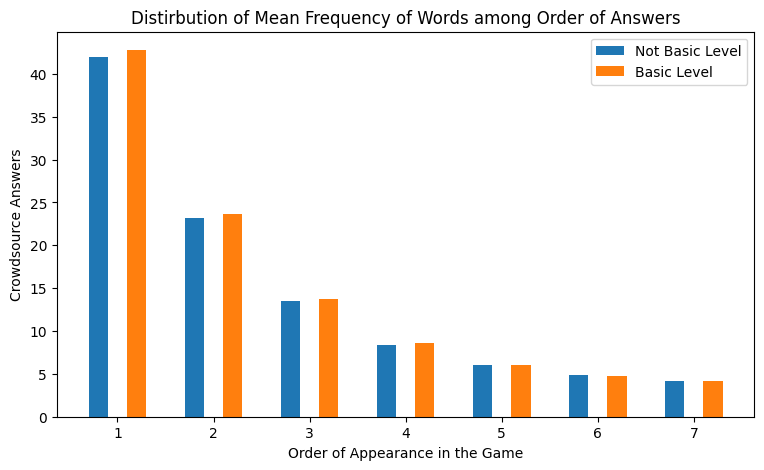

In [ ]:
df_grouped0 =  pd.DataFrame(all_df[(all_df["label"]==0)][["freq","label","rank" ]].groupby(by ="rank", group_keys=True)["freq"].mean())
df_grouped1 = pd.DataFrame( all_df[(all_df["label"]==1)][["freq","label", "rank"]].groupby(by = "rank", group_keys=True)["freq"].mean())
df_grouped0.columns = ["Frequency of Basic Level Category"]
df_grouped1.columns = ["Frequency of Basic Level Category"]

plt.figure(figsize=(9,5))
plt.bar(np.arange(1,8)-0.2, df_grouped0.values.reshape(-1), 0.2,label="Not Basic Level")
plt.bar(np.arange(1,8)+0.2, df_grouped1.values.reshape(-1),0.2,label="Basic Level")
plt.title("Distribution of Mean Frequency of Words among Order of Answers")
# Display the plot
plt.legend()
plt.xlabel("Order of Appearance in the Game")
plt.ylabel("Crowdsource Answers")
plt.show()


RuntimeError: ignored

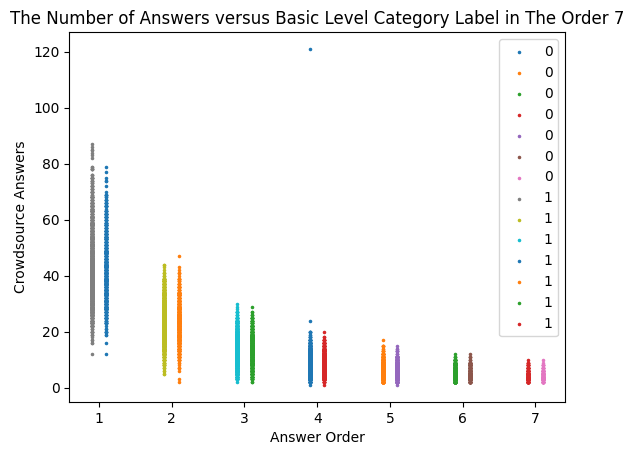

In [ ]:
df_grouped0 = all_df[(all_df["label"]==0)][["freq","label","rank" ]].groupby(by = "rank")
df_grouped1 = all_df[(all_df["label"]==1)][["freq","label", "rank"]].groupby(by = "rank")

fig, ax = plt.subplots()

for name, group in df_grouped0:
    # Plot scatter plot for each group
    ax.scatter(group['rank']+0.1, group['freq'], label = "0", s=2.4)
for name, group in df_grouped1:
    # Plot scatter plot for each group
    ax.scatter(group['rank']-0.1, group['freq'], label = "1", s=2.4)
ax.legend()
plt.title(f"The Number of Answers versus Basic Level Category Label in The Order {i+1}")
plt.xlabel("Answer Order")
plt.ylabel("Crowdsource Answers")
cbar = plt.colorbar()
cbar.set_label(group["label"])
plt.show()

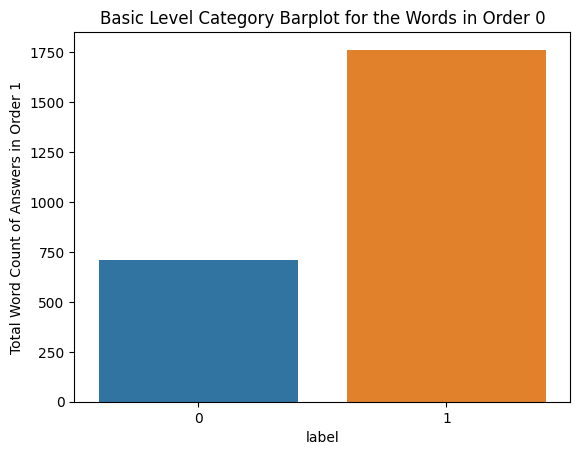

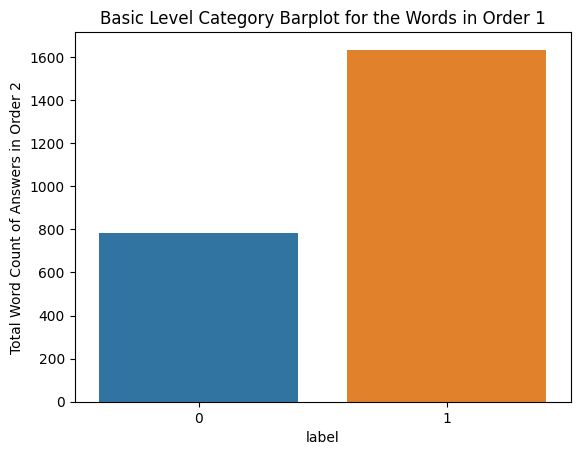

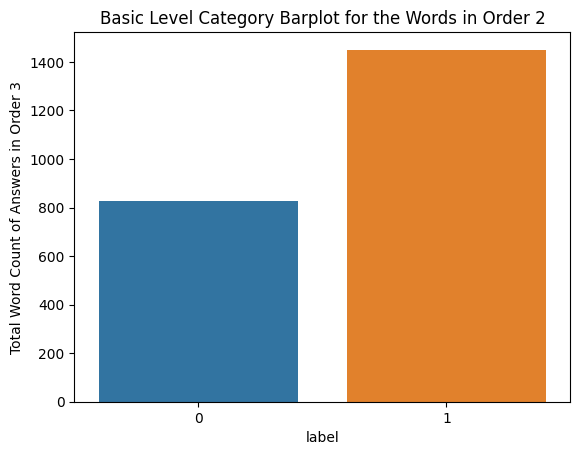

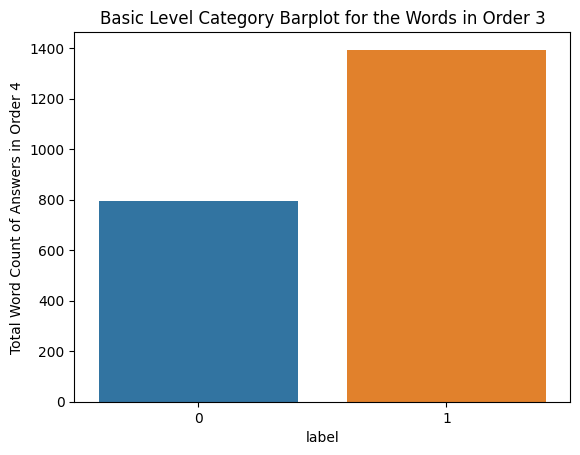

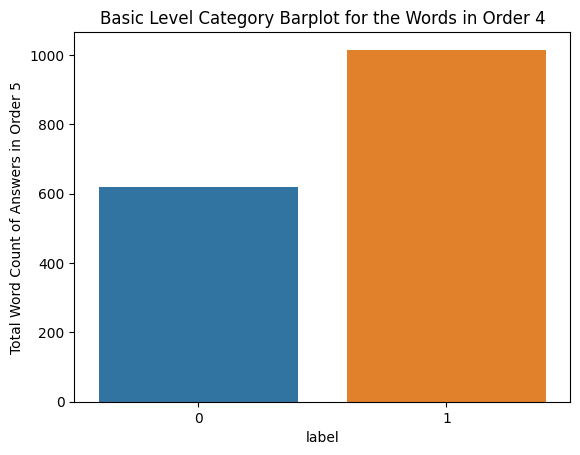

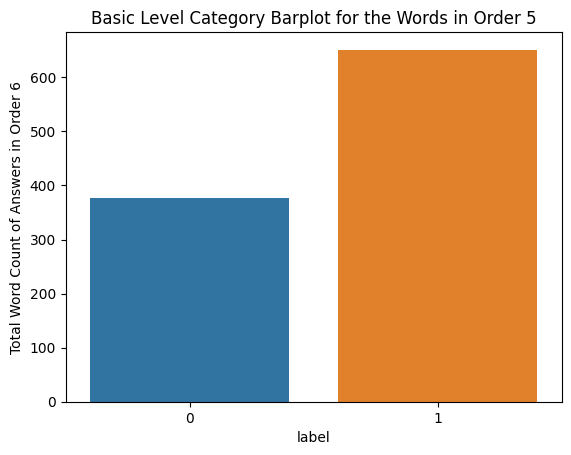

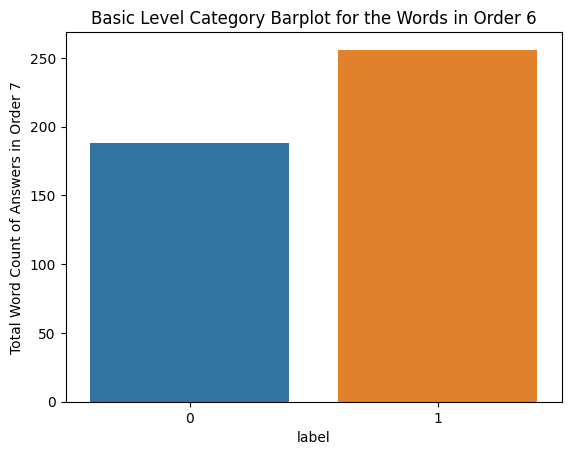

In [ ]:
for i in range(7):

  rank_count = pd.DataFrame(all_df[(all_df["rank"]== i+1)].groupby(by = "label", group_keys=True).apply(lambda x: len(x)), columns = [f"Total Word Count of Answers in Order {i+1}"])
  sns.barplot(data=rank_count, x=rank_count.index, y = f"Total Word Count of Answers in Order {i+1}")
  plt.title(f"Basic Level Category Barplot for the Words in Order {i}")
  plt.show()

In [ ]:
all = pd.read_csv("/content/drive/MyDrive/EEE_486/Code/all_df.csv")
all

,Unnamed: 0,answer,rank,0,1,2,3,4,5,6,label,length,AoA_rating,concreteness,unigram_frequency
0,0,Touch,1.0,101.0,8241.0,102.0,0.0,0.0,0.0,0.0,1.0,5,5.16,5.956,0.585
1,1,Server,1.0,101.0,11942.0,102.0,0.0,0.0,0.0,0.0,1.0,6,9.94,6.554,0.660
2,2,Lane,1.0,101.0,5404.0,102.0,0.0,0.0,0.0,0.0,1.0,4,7.00,6.589,0.679
3,3,Beer,1.0,101.0,10236.0,2009.0,102.0,0.0,0.0,0.0,1.0,4,6.11,8.240,0.660
4,4,Island,1.0,101.0,3422.0,102.0,0.0,0.0,0.0,0.0,0.0,6,7.41,7.386,0.585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3866,3866,Flush,3.0,101.0,3132.0,2051.0,3749.0,102.0,0.0,0.0,1.0,5,5.17,5.019,0.734
3867,3867,Bandy,3.0,101.0,19070.0,2075.0,102.0,0.0,0.0,0.0,1.0,5,12.45,2.777,0.000
3868,3868,House,3.0,101.0,14415.0,9516.0,5562.0,102.0,0.0,0.0,1.0,5,3.16,8.179,0.437
3869,3869,Clean,3.0,101.0,18302.0,102.0,0.0,0.0,0.0,0.0,1.0,5,3.89,4.649,0.604


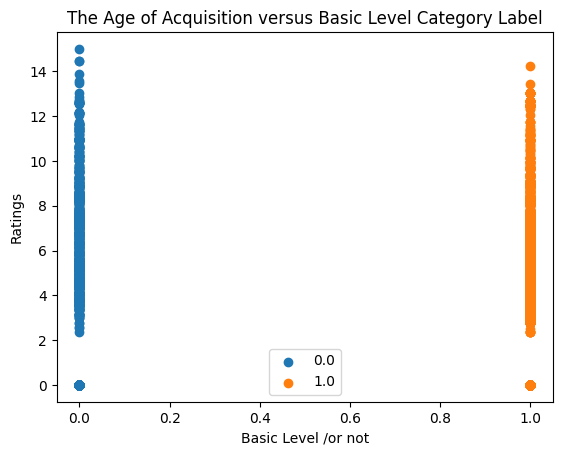

In [ ]:
df_grouped_aoa = all[["AoA_rating","label"]].groupby(by = "label")
fig, ax = plt.subplots()

for name, group in df_grouped_aoa:
    # Plot scatter plot for each group
    ax.scatter(group['label'], group['AoA_rating'], label=name)
ax.legend()
plt.title("The Age of Acquisition versus Basic Level Category Label")
plt.xlabel("Basic Level /or not")
plt.ylabel("Ratings")

plt.show()

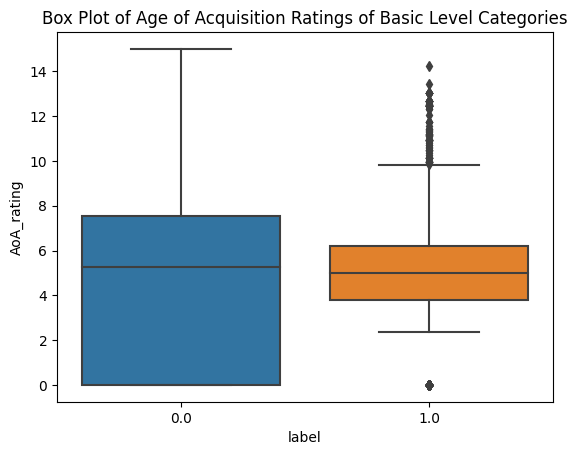

In [ ]:
sns.boxplot(x='label', y='AoA_rating', data=all[["AoA_rating","label"]])
plt.title("Box Plot of Age of Acquisition Ratings of Basic Level Categories")
plt.show()

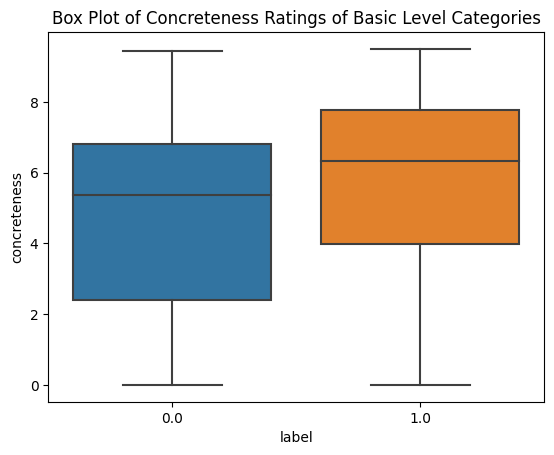

In [ ]:
sns.boxplot(x='label', y='concreteness', data=all[["concreteness","label"]])
plt.title("Box Plot of Concreteness Ratings of Basic Level Categories")
plt.show()

In [ ]:
all

,Unnamed: 0,answer,rank,0,1,2,3,4,5,6,label,length,AoA_rating,concreteness,unigram_frequency
0,0,Touch,1.0,101.0,8241.0,102.0,0.0,0.0,0.0,0.0,1.0,5,5.16,5.956,0.585
1,1,Server,1.0,101.0,11942.0,102.0,0.0,0.0,0.0,0.0,1.0,6,9.94,6.554,0.660
2,2,Lane,1.0,101.0,5404.0,102.0,0.0,0.0,0.0,0.0,1.0,4,7.00,6.589,0.679
3,3,Beer,1.0,101.0,10236.0,2009.0,102.0,0.0,0.0,0.0,1.0,4,6.11,8.240,0.660
4,4,Island,1.0,101.0,3422.0,102.0,0.0,0.0,0.0,0.0,0.0,6,7.41,7.386,0.585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3866,3866,Flush,3.0,101.0,3132.0,2051.0,3749.0,102.0,0.0,0.0,1.0,5,5.17,5.019,0.734
3867,3867,Bandy,3.0,101.0,19070.0,2075.0,102.0,0.0,0.0,0.0,1.0,5,12.45,2.777,0.000
3868,3868,House,3.0,101.0,14415.0,9516.0,5562.0,102.0,0.0,0.0,1.0,5,3.16,8.179,0.437
3869,3869,Clean,3.0,101.0,18302.0,102.0,0.0,0.0,0.0,0.0,1.0,5,3.89,4.649,0.604


In [ ]:
all_df.columns = ["answer", "rank", "crowsource count", "label","length"]

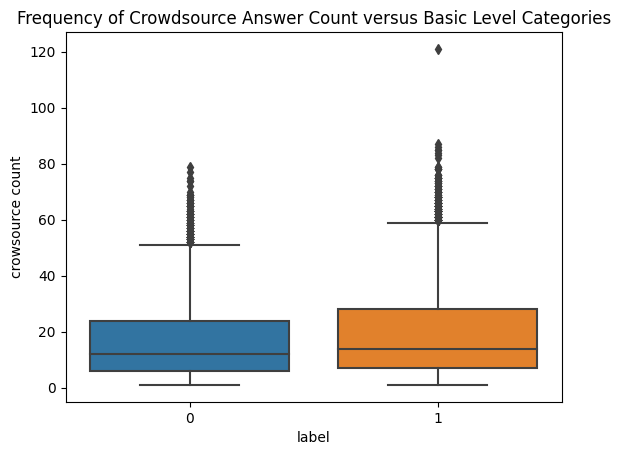

In [ ]:
sns.boxplot(x='label', y='crowsource count', data=all_df[["crowsource count","label"]])
plt.title("Frequency of Crowdsource Answer Count versus Basic Level Categories")
plt.show()

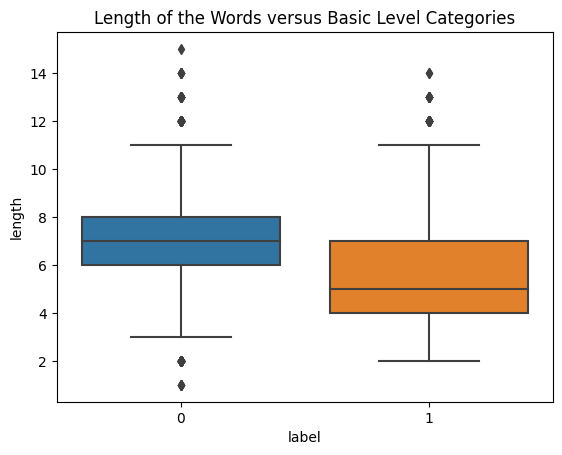

In [ ]:
sns.boxplot(x='label', y='length', data=all_df[["length","label"]])
plt.title("Length of the Words versus Basic Level Categories")
plt.show()

In [ ]:
all

,Unnamed: 0,answer,rank,0,1,2,3,4,5,6,label,length,AoA_rating,concreteness,unigram_frequency
0,0,Touch,1.0,101.0,8241.0,102.0,0.0,0.0,0.0,0.0,1.0,5,5.16,5.956,0.585
1,1,Server,1.0,101.0,11942.0,102.0,0.0,0.0,0.0,0.0,1.0,6,9.94,6.554,0.660
2,2,Lane,1.0,101.0,5404.0,102.0,0.0,0.0,0.0,0.0,1.0,4,7.00,6.589,0.679
3,3,Beer,1.0,101.0,10236.0,2009.0,102.0,0.0,0.0,0.0,1.0,4,6.11,8.240,0.660
4,4,Island,1.0,101.0,3422.0,102.0,0.0,0.0,0.0,0.0,0.0,6,7.41,7.386,0.585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3866,3866,Flush,3.0,101.0,3132.0,2051.0,3749.0,102.0,0.0,0.0,1.0,5,5.17,5.019,0.734
3867,3867,Bandy,3.0,101.0,19070.0,2075.0,102.0,0.0,0.0,0.0,1.0,5,12.45,2.777,0.000
3868,3868,House,3.0,101.0,14415.0,9516.0,5562.0,102.0,0.0,0.0,1.0,5,3.16,8.179,0.437
3869,3869,Clean,3.0,101.0,18302.0,102.0,0.0,0.0,0.0,0.0,1.0,5,3.89,4.649,0.604


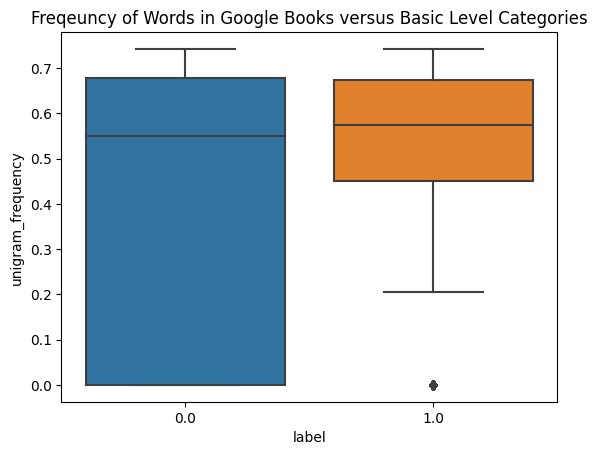

In [ ]:
sns.boxplot(x='label', y='unigram_frequency', data=all[["unigram_frequency","label"]])
plt.title("Freqeuncy of Words in Google Books versus Basic Level Categories")
plt.show()

In [ ]:
df_grouped0 = all_df[(all_df["label"]==0)][["freq","label","rank" ]].groupby(by = "rank")
df_grouped1 = all_df[(all_df["label"]==1)][["freq","label", "rank"]].groupby(by = "rank")

fig, ax = plt.subplots()

for name, group in df_grouped0:
    # Plot scatter plot for each group
    ax.scatter(group['rank']+0.1, group['freq'], label = "0", s=2.4)
for name, group in df_grouped1:
    # Plot scatter plot for each group
    ax.scatter(group['rank']-0.1, group['freq'], label = "1", s=2.4)
ax.legend()
plt.title(f"The Number of Answers versus Basic Level Category Label in The Order {i+1}")
plt.xlabel("Answer Order")
plt.ylabel("Crowdsource Answers")
cbar = plt.colorbar()
cbar.set_label(group["label"])
plt.show()